<a href="https://colab.research.google.com/github/vickkiee/dgadata/blob/main/MLF_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Foundations - **Supervised Learning**


# New Section

The below cell does the following

1.   Loads Required Libraries
2.   Loads and prepares the data
3. Displays our data in a dataframe



Our data for this example is about the quality of  wine. We have detailed information about the properties of the wine such as the malic-acid, magensium, ash, etc which are present in the wine. From these properties, the quality of the wine is determined and given a class rating from 0 to 2.

In [ ]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the modules required to build and evaluate a DT model
from sklearn.tree import DecisionTreeClassifier #The algorithm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#Loading the wine dataset from sklearn
from sklearn.datasets import load_wine

#loading data
wine = load_wine()

# There are three key parts to the dataset we care about
#(1) The features(X)
X = wine.data


#(2) The target classes(y)
y = wine.target

df = pd.DataFrame(X, columns=wine['feature_names'])
df['class'] = wine.target


print("Number of rows in the data: " + str(df.shape[0]))
df.sample(10)

Number of rows in the data: 178


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685.0,2
90,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0,0
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0,1
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0,2
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0,1
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0,2


We have used a python library to process the data and display it in a dataframe. Below we will highlight the features (X) in green and the target/label (Y) in red. Recall supervised learning requires labels in our dataset.
*   Green highlight = Features
*   Red highlight = Labels


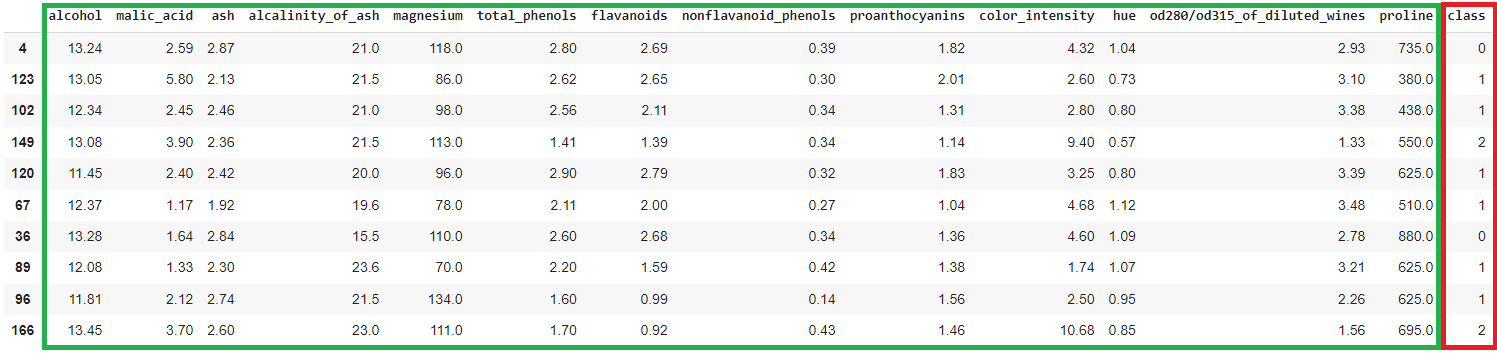

Now we will use our data to train a machine learning model so that the model can predict classes of the wine when we test it with new data

In [ ]:
#Run this code cell to see how the tree is making a binary decision (true or false) at each node of the tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

X = wine.data
y = wine.target

#This line below the class types into strings so that its visible on the leaf graphics as the final output
y_2 = [str(x) for x in y]

X_train, X_test, y_train, y_test = train_test_split(X,y_2,test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In the above code, in the last line, we fit our data onto our model. Again, we have highlighted the features (X) in green and the target/label (Y) in red.

Capture.PNG

Now, we can predict the class (1, 2 or 3) of a wine by testing with the data about that particular wine. The dataframe below is the wine we will be testing.

In [ ]:
pd.DataFrame(X_test[0].reshape(1,-1), columns=wine['feature_names'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.7,3.87,2.4,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0


In [ ]:
print("The predicted wine class is: " + str(model.predict(X_test[0].reshape(1,-1))))

The predicted wine class is: ['1']


---

# **Looking at Cats -vs- Dogs Data**

Now we will look at a dataset that contains images of cats and dogs.

In [ ]:
import zipfile

!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


#### Organizing folders
base_dir = './cats_and_dogs_filtered'

--2023-06-20 17:10:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 108.177.11.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   180MB/s    in 0.4s    

2023-06-20 17:10:12 (180 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



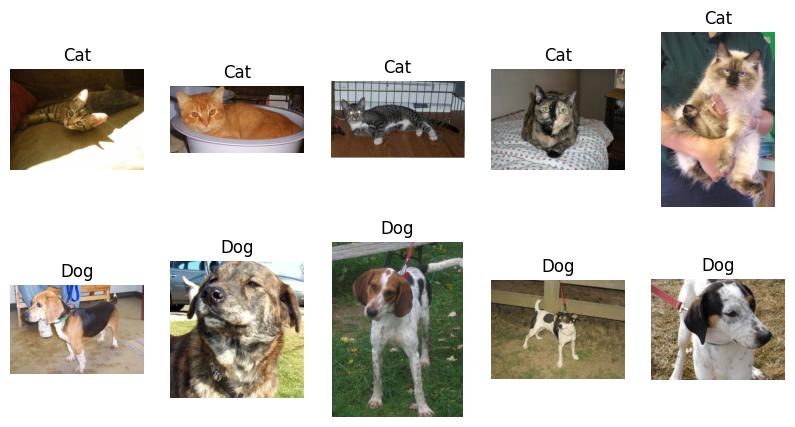

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the paths to the images
cats_dir = "/content/cats_and_dogs_filtered/train/cats"
dogs_dir = "/content/cats_and_dogs_filtered/train/dogs"

# Get the filenames of the images
cat_files = os.listdir(cats_dir)
dog_files = os.listdir(dogs_dir)

# Display some images and their labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    # Load the image
    if i < 5:
        img = cv2.imread(os.path.join(cats_dir, cat_files[i]))
        ax.set_title("Cat")
    else:
        img = cv2.imread(os.path.join(dogs_dir, dog_files[i-5]))
        ax.set_title("Dog")
    # Display the image
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
plt.show()

Below we will highlight the features (X) in green and the label (Y) in red as above.

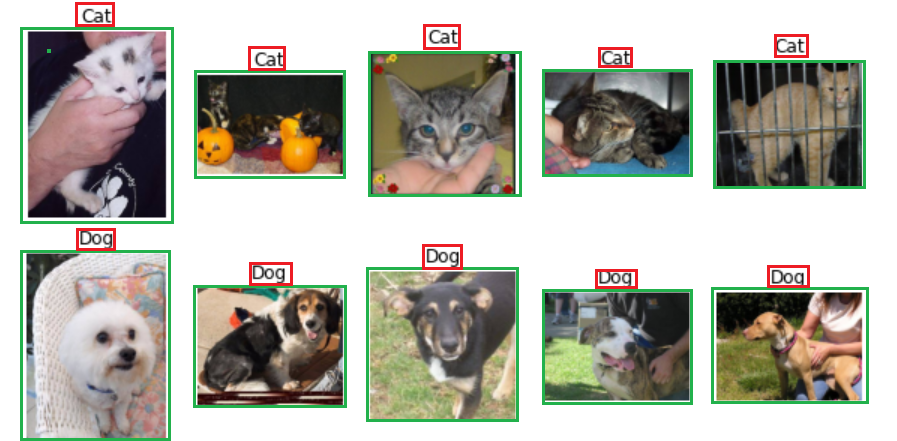